Snehal Avinash Bhagwate - AI-May-Jun-2025

Given DataSet Is :
            id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     8

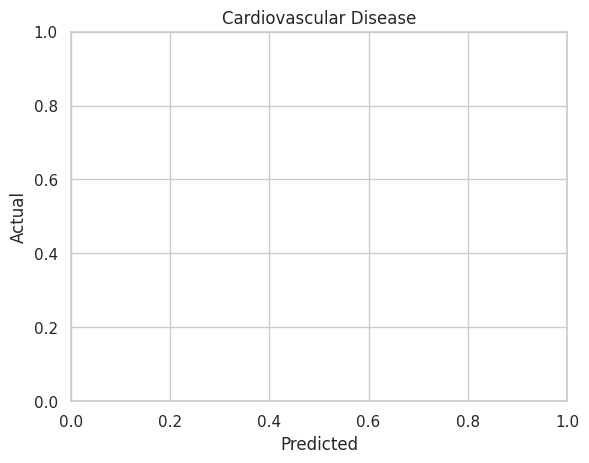

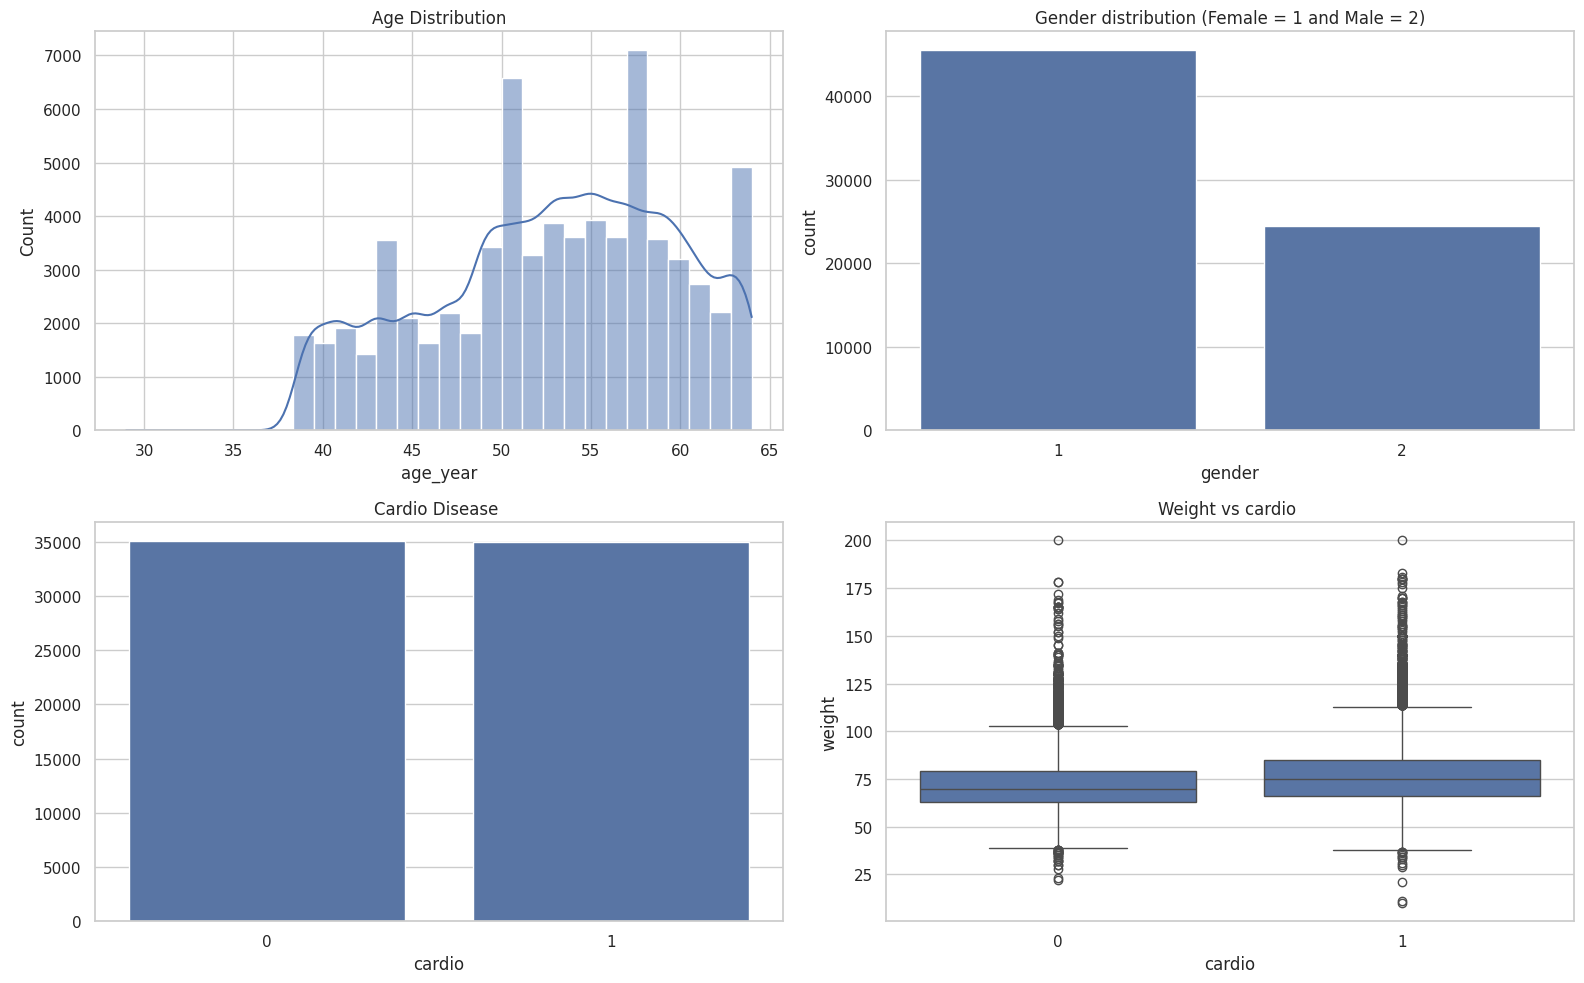

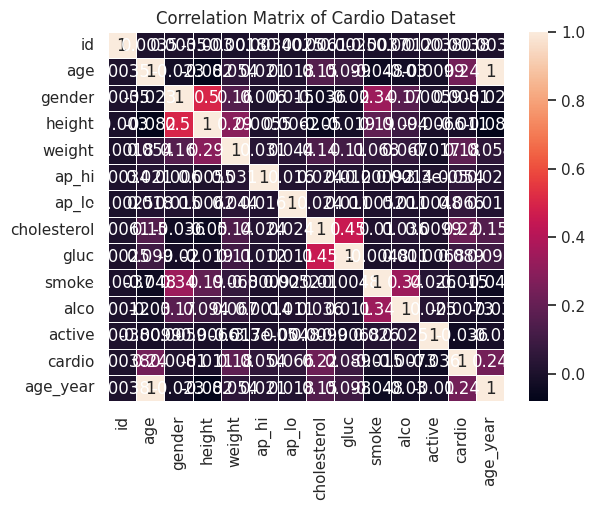

SVM Accuracy: 0.7298
KNN Accuracy: 0.6251
Decision Tree Accuracy: 0.6349
Logistic Regression Accuracy: 0.7236
Random Forest Accuracy: 0.7269
Random Forest Model Accuracy: 0.7261

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.75      0.73      6988
           1       0.74      0.70      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



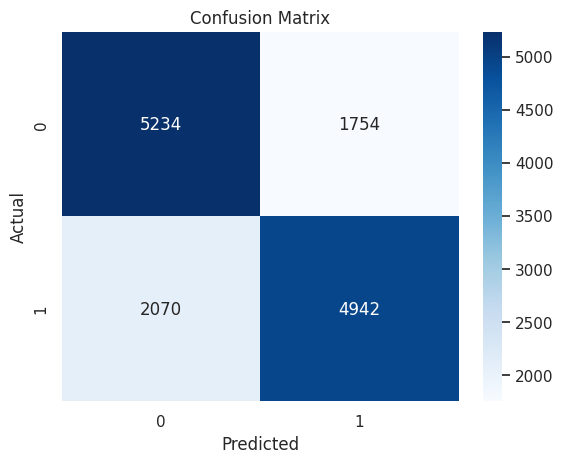

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv(r"/content/cardio_train (1).csv", sep =',')
df

df.columns = df.columns.str.strip()

print(df.head())
print(df.columns)

df['age_year']=(df['age']/365).astype(int)

df.head()
df.info()
df.describe()

df.isnull().sum()

df=df.dropna()
df

x=df.iloc[:,0:12]
x
y=df.iloc[:,12]
y

plt.title("Cardiovascular Disease")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

sns.set(style= "whitegrid")
plt.figure(figsize=(16,10))

plt.subplot(2, 2, 1)
sns.histplot(df['age_year'], bins =  30 , kde = True)
plt.title('Age Distribution')

plt.subplot(2, 2, 2)
sns.countplot(x='gender', data=df)
plt.title('Gender distribution (Female = 1 and Male = 2)')

plt.subplot(2, 2, 3)
sns.countplot(x='cardio', data =df)
plt.title('Cardio Disease ')

plt.subplot(2, 2, 4)
sns.boxplot(x='cardio', y='weight' , data=df)
plt.title('Weight vs cardio ')

plt.tight_layout()
plt.show()

cor_matrix = df.corr()
cor_matrix

sns.heatmap(cor_matrix, annot=True, cmap='rocket', linewidths=0.5)
plt.title('Correlation Matrix of Cardio Dataset')
plt.show()


x = df.drop(['cardio'],axis=1)
x
y = df['cardio']
y

#Split the Data
xtrain, xtest, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

# Train and Evaluate Models
scaler = StandardScaler()
x_train = scaler.fit_transform(xtrain)
x_test = scaler.transform(xtest)

models = {
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")


#Visualize Predictions
rf_model= RandomForestClassifier()
rf_model.fit(x_train, y_train)

y_predict= rf_model.predict(x_test)
y_predict

#Accuracy
acc=accuracy_score(y_test, y_predict)
print(f"Random Forest Model Accuracy: {acc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


